# INSTALLING AND IMPORTING INDEPENDENCIES

In [1]:
%pip list

Package            Version
------------------ -----------
asttokens          3.0.0
colorama           0.4.6
comm               0.2.2
debugpy            1.8.11
decorator          5.1.1
exceptiongroup     1.2.2
executing          2.1.0
importlib-metadata 8.5.0
ipykernel          6.29.5
ipython            8.18.1
jedi               0.19.2
jupyter-client     8.6.3
jupyter-core       5.7.2
matplotlib-inline  0.1.7
nest-asyncio       1.6.0
packaging          24.2
parso              0.8.4
pip                20.2.3
platformdirs       4.3.6
prompt-toolkit     3.0.48
psutil             6.1.0
pure-eval          0.2.3
pygments           2.18.0
python-dateutil    2.9.0.post0
pywin32            308
pyzmq              26.2.0
setuptools         49.2.1
six                1.17.0
stack-data         0.6.3
tornado            6.4.2
traitlets          5.14.3
typing-extensions  4.12.2
wcwidth            0.2.13
zipp               3.21.0
Note: you may need to restart the kernel to use updated packages.




*   **opencv-python:** preprocessing data
*   **matplotlib:** rendering the results
*   **imageio:** converting numpy arrays to gifs
*   **gdown:** downloading our dataset
*   **tensorflow:** build our deep neural network

In [2]:
%pip uninstall tensorflow
%pip uninstall keras

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.17.1
Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-3.5.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-3.5.0


In [2]:
%pip install tensorflow==2.10.0
%pip install keras==2.10.0

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install opencv-python matplotlib imageio gdown

Note: you may need to restart the kernel to use updated packages.




*   os: makes it easier to navigate and traverse through different file systems
*   cv2: needed to last the import opencv
*   tensorflow: the primary deep learning framework we're gonna use (we're also gonna use dta pipelines)
*   numpy: preprocessing arrays
*   typing: type annotations



In [8]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [9]:
tf.config.list_physical_devices('GPU') #allows us to see which physical devices we have on our machine

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

The next line prevents exponential memory growth

In [10]:
physical_devices = tf.config.list_physical_devices('GPU') #allows us to see which physical devices we have on our machine
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  pass

# BUILD DATA LOADING FUNCTIONS

In this part, we're gonna load up our videos and preprocess our annotations(in this case they're sentences)

In [11]:
import gdown #gdown makes it easy to get data from google drive

In [7]:
url= 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output='data.zip'
gdown.download(url, output, quiet=False)  #dowloading
gdown.extractall(output)  #extracting

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=3d8a8eba-9023-4a62-8cad-70cce800f4d8
To: /content/data.zip
100%|██████████| 423M/423M [00:05<00:00, 78.5MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [12]:
#Function for loading and preprocessing video
def load_video(path: str) -> List[float]:
  cap=cv2.VideoCapture(path) #creating a cv2 video capture instance
  frames=[]
  for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): #loops through each frame and stores it in the frames array
    ret, frame=cap.read()
    frame=tf.image.rgb_to_grayscale(frame) #we convert the data from rgb to grayscale to have less data to preprocess
    frames.append(frame[190:236,80:220,:]) #isolating the mouth region statically(we can use DLIB to do it dynamically but we'll pass on that for now)
  cap.release()

  mean=tf.math.reduce_mean(frames)
  std=tf.math.reduce_std(tf.cast(frames, tf.float32))
  return tf.cast((frames-mean), dtype=tf.float32)/std #we standardize our image features

In [13]:
#defining a vocab(it's every single character we can expect to encounter within our annotations)
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [14]:
#converting from characters to numbers and from numbers to characters
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True)

print(f"The vocabulary is: {char_to_num.get_vocabulary()}\n"
      f"(size: {char_to_num.vocabulary_size()})")

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' ']
(size: 40)


In [11]:
#Function for loading and preprocessing alignements
def load_alignments(path:str) -> List[str]:
    with open(path,'r') as f:
        lines=f.readlines()
    tokens=[]
    for line in lines:
        line = line.split()
        if line[2]!='sil':  # Exclude silence markers
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens,input_encoding='UTF-8'), (-1)))

In [ ]:
# Fonction pour charger et prétraiter les alignements
def load_alignments(path:str) -> List[str]:
    with open(path,'r') as f:
        lines=f.readlines()
    tokens=[]
    for line in lines:
        line = line.split()
        if line[2]!='sil':  # Exclure les marqueurs de silence
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens,input_encoding='UTF-8'), (-1)))

In [12]:
'''
#loading both the videos and alignments simultaneously for linux
def load_data(path: str): #takes the path to a video and splits it to have a video path and alignment path
  path=bytes.decode(path.numpy())
  print(f"Generated path: {path}")
  file_name=path.split('/')[-1].split('.')[0] #splits the path string using slashes and takes the last element without the ectention
  video_path=os.path.join('data', 's1', f'{file_name}.mpg') #constructs a path data/s1/...
  alignments_path=os.path.join('data','alignments', 's1', f'{file_name}.align')
  frames=load_video(video_path)
  alignments=load_alignments(alignments_path)
  return frames, alignments
'''

In [ ]:
#loading both the videos and alignments simultaneously (for windows)
def load_data(path: str): #takes the path to a video and splits it to have a video path and alignment path
  path=bytes.decode(path.numpy())
  print(f"Generated path: {path}")
  file_name=path.split('\\')[-1].split('.')[0] #splits the path string using slashes and takes the last element without the ectention
  video_path=os.path.join('data', 's1', f'{file_name}.mpg') #constructs a path data\s1\...
  alignments_path=os.path.join('data','alignments', 's1', f'{file_name}.align')
  print(f"Generated video path: {video_path}")
  print(f"Generated alignments path: {alignments_path}")
  frames=load_video(video_path)
  alignments=load_alignments(alignments_path)
  return frames, alignments

In [ ]:
# Chargement simultané des vidéos et des alignements (pour Windows)
def load_data(path: str): # prend le chemin d'une vidéo et le divise pour obtenir un chemin vidéo et un chemin d'alignement
  path=bytes.decode(path.numpy())
  print(f"Chemin généré : {path}")
  file_name=path.split('\\')[-1].split('.')[0] # divise la chaîne de chemin en utilisant des barres obliques et prend le dernier élément sans l'extension
  video_path=os.path.join('data', 's1', f'{file_name}.mpg') # construit un chemin data\s1\...
  alignments_path=os.path.join('data','alignments', 's1', f'{file_name}.align')
  frames=load_video(video_path)
  alignments=load_alignments(alignments_path)
  return frames, alignments

We test our load_data

In [13]:
test_path="./data/s1/bbal6n.mpg"

In [15]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbal6n'

In [16]:
frames, alignments=load_data(tf.convert_to_tensor(test_path)) #converts a raw string to a tensorflow tensor and passes it to the load_data function
print({"frames" : frames,
        "alignments" : alignments})

Generated path: ./data/s1/bbal6n.mpg
Generated video path: data/s1/bbal6n.mpg
Generated alignments path: data/alignments/s1/bbal6n.align
{'frames': <tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
array([[[[ 1.4603736 ],
         [ 1.4603736 ],
         [ 1.4209042 ],
         ...,
         [ 0.15787823],
         [ 0.19734779],
         [ 0.07893912]],

        [[ 1.4603736 ],
         [ 1.4603736 ],
         [ 1.4209042 ],
         ...,
         [ 0.15787823],
         [ 0.07893912],
         [ 0.03946956]],

        [[ 1.4209042 ],
         [ 1.4209042 ],
         [ 1.3814346 ],
         ...,
         [ 0.07893912],
         [ 0.07893912],
         [ 0.07893912]],

        ...,

        [[ 0.9472694 ],
         [ 0.9472694 ],
         [ 0.9472694 ],
         ...,
         [ 9.946329  ],
         [ 9.86739   ],
         [ 9.86739   ]],

        [[ 0.9472694 ],
         [ 0.9472694 ],
         [ 0.9472694 ],
         ...,
         [ 9.906859  ],
         [ 9.86739   ],
      

the shape of the frame is (length of frames, height of frames in pixels , width of frames in pixels, number of channels)
we had 1 channel because we converted the frame from rgb to grayscale

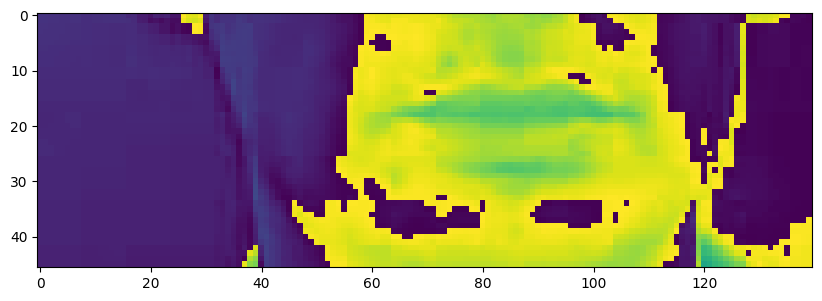

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(frames[0]) #plotting a frame (if we stack all the frames together it should technically show the mouth moving)
plt.show()

In [18]:
print(f"alignments before preprocessing :{tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()]).numpy()}")
print(f"alignments after preprocessing :{alignments.numpy()}")

alignments before preprocessing :b' bin blue at l six now'
alignments after preprocessing :[39  2  9 14 39  2 12 21  5 39  1 20 39 12 39 19  9 24 39 14 15 23]


In [19]:
#wrapping evrything in a tf.py_function
def mappable_function(path:str) -> List[str]:
  result=tf.py_function(load_data, [path], [tf.float32, tf.int64])
  return result

# CREATING DATA PIPELINE

Our data pipeline will help train our deep learning model

In [45]:
data=tf.data.Dataset.list_files('./data/s1/*.mpg') #creating a dataset
data=data.shuffle(500, reshuffle_each_iteration=False)  #shuffling it
data=data.map(mappable_function)  #before doing this, getting the data will just return a path, now it will return the actual data
#each input data has variable shapes or variable lengths.
#Padding ensures that all elements in a batch have the same shape by adding padding where necessary.
#the next line ensures there is 75 frames and 40 alignments, otherwise it pads them, also, we get 2 videos and 2 sets of alignments
data=data.padded_batch(2,padded_shapes=([75,None,None,None],[40]))
data=data.prefetch(tf.data.AUTOTUNE)  #we ensure to optimise our data pipeline, we preload as our ML model is stil training

train= data.take(450)
test=data.skip(450)


In [21]:
frames, alignments= data.as_numpy_iterator().next()

Generated path: ./data/s1/sgbc6n.mpg
Generated video path: data/s1/sgbc6n.mpg
Generated alignments path: data/alignments/s1/sgbc6n.align
Generated path: ./data/s1/bril8n.mpg
Generated video path: data/s1/bril8n.mpg
Generated alignments path: data/alignments/s1/bril8n.align
Generated path: ./data/s1/swwv8p.mpg
Generated video path: data/s1/swwv8p.mpg
Generated alignments path: data/alignments/s1/swwv8p.align


In [22]:
alignments #we can see trailing zeros at the end of the alignments, thats padding

array([[39, 19,  5, 20, 39,  7, 18,  5,  5, 14, 39,  2, 25, 39,  3, 39,
        19,  9, 24, 39, 14, 15, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [39,  2,  9, 14, 39, 18,  5,  4, 39,  9, 14, 39, 12, 39,  5,  9,
         7,  8, 20, 39, 14, 15, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]])

In [23]:
test= data.as_numpy_iterator() #this just iterates through our data

In [24]:
val=test.next(); val[0] #val[0] returns our frames

Generated path: ./data/s1/pwby1a.mpg
Generated video path: data/s1/pwby1a.mpg
Generated alignments path: data/alignments/s1/pwby1a.align
Generated path: ./data/s1/prbj4n.mpg
Generated video path: data/s1/prbj4n.mpg
Generated alignments path: data/alignments/s1/prbj4n.align


array([[[[[1.2991993 ],
          [1.2991993 ],
          [1.2991993 ],
          ...,
          [9.017972  ],
          [9.438301  ],
          [9.514725  ]],

         [[1.2991993 ],
          [1.2991993 ],
          [1.2991993 ],
          ...,
          [8.788701  ],
          [9.438301  ],
          [9.438301  ]],

         [[1.2991993 ],
          [1.2991993 ],
          [1.2991993 ],
          ...,
          [9.438301  ],
          [0.03821174],
          [0.03821174]],

         ...,

         [[0.95529366],
          [0.95529366],
          [0.8788701 ],
          ...,
          [9.667572  ],
          [9.705784  ],
          [9.705784  ]],

         [[0.95529366],
          [0.95529366],
          [0.8788701 ],
          ...,
          [9.62936   ],
          [9.667572  ],
          [9.705784  ]],

         [[0.95529366],
          [0.95529366],
          [0.8788701 ],
          ...,
          [9.62936   ],
          [9.667572  ],
          [9.667572  ]]],


        [[[1.2991

Generated path: ./data/s1/lgwm9a.mpg
Generated video path: data/s1/lgwm9a.mpg
Generated alignments path: data/alignments/s1/lgwm9a.align


In [25]:
frames = val[0][1]  #grabs the 2nd instance of the video(we have 2 sets of videos inside each batch)
frames_uint8 = np.squeeze((frames * 255).astype(np.uint8))# Convert the frames to uint8 with values between 0 and 255 and drop the extra dimension
imageio.mimsave('./animation.gif', frames_uint8) # Save the GIF

the gif is what the model is going to learn to decode

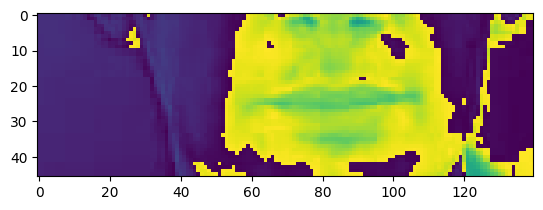

In [26]:
#1st frame of 1st video in videos
plt.imshow(val[0][0][0])
plt.show()

In [27]:
tf.strings.reduce_join([num_to_char(word) for word in val [1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b' place white by y one again'>

# DESIGN DEEP NEURAL NETWORK

* Conv3D: 3d convolution,typically used for video processing
* LSTM: neural network
* ModelCheckpoint: allows us to save our model every certain number of epochs
* LearningRateScheduler: allows us to start fast and eventually slow down when we get close.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [ ]:
model = Sequential()  # Instantiate a sequential model, which allows stacking layers in a linear fashion.

# Add a 3D convolutional layer with 128 filters of size 3x3x3.
# The input shape is (75, 46, 140, 1), where 75 is the number of frames, 46 and 140 are the dimensions of each frame, and 1 is the number of channels (grayscale).
# 'padding="same"' ensures that the output size is the same as the input size.
model.add(Conv3D(128, 3, input_shape=(75, 46, 140, 1), padding='same'))  
model.add(Activation('relu'))  # Add a ReLU activation function to introduce non-linearity into the model.
model.add(MaxPool3D((1, 2, 2)))  # Apply a max pooling operation to reduce the size of the frames, taking the maximum over 2x2 windows.

# Add a second 3D convolutional layer with 256 filters.
# This layer learns more complex features from the outputs of the previous layer.
model.add(Conv3D(256, 3, padding='same'))  
model.add(Activation('relu'))  # ReLU activation function.
model.add(MaxPool3D((1, 2, 2)))  # Further reduce the size of the frames.

# Add a third 3D convolutional layer with 75 filters.
model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))  # ReLU activation function.
model.add(MaxPool3D((1, 2, 2)))  # Reduce the size of the frames again.

# Use TimeDistributed to flatten the frames while preserving the temporal dimension.
# This prepares the data for input into the LSTM network.
model.add(TimeDistributed(Flatten()))  # Flatten each frame into a vector.

# Add a bidirectional LSTM layer with 128 units.
# 'return_sequences=True' allows the layer to return the full sequence of outputs for each frame, which is necessary for subsequent layers.
model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))  
model.add(Dropout(0.5))  # Add a dropout layer to regularize the model by dropping 50% of the units during training.

# Add a second bidirectional LSTM layer.
model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(0.5))  # Additional regularization with dropout.

# Add a final dense layer that produces the predictions.
# The number of units is equal to the size of the vocabulary (char_to_num.vocabulary_size()) + 1 to include a class for the empty character.
# The softmax activation function provides probabilities for each class, facilitating the use of argmax to obtain the predicted class.
model.add(Dense(char_to_num.vocabulary_size() + 1, kernel_initializer='he_normal', activation='softmax'))  
# The output should have the shape (75, 41), where 75 is the number of frames and 41 is the number of classes (characters) in the output.

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [32]:
yhat=model.predict(val[0])

1/1 [==============================] - 11s 11s/step


In [33]:
yhat[0].shape

(75, 41)

In [34]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[1]])

<tf.Tensor: shape=(), dtype=string, numpy=b'uqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqq'>

In [35]:
model.input_shape

(None, 75, 46, 140, 1)

In [37]:
model.output_shape

(None, 75, 41)

# SETUP TRAINING OPTIONS AND TRAIN

In [38]:
# define a learning rate scheduler
def scheduler(epoch, lr):
  if epoch < 30:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [39]:
#Compute the Connectionist Temporal Classification (CTC) loss function
def CTCLoss(y_true, y_pred):

    # Get the batch size (number of samples in the batch)
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")

    # Get the length of the predicted sequences (time steps in the model output)
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")

    # Get the length of the ground-truth sequences (number of labels in the actual output)
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    # Create a tensor for input lengths, where all entries are the same (input_length for each sample)
    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    # Create a tensor for label lengths, where all entries are the same (label_length for each sample)
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    # Compute the CTC loss using TensorFlow's built-in function
    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)

    # Return the computed loss
    return loss


In [40]:
class ProduceExample(tf.keras.callbacks.Callback):
  def __init__(self, dataset)-> None:
    self.dataset= dataset.as_numpy_iterator()
  def on_epoch_end(self, epoch, logs=None) -> None:
    data=self.dataset.next()
    yhat=self.model.predict(data[0])
    decoded=tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()  #ctc_decode is used to decode the outputs of our ctc training model
    for x in range(len(yhat)):
      print('Original:', tf.strings.reduce_join([vocab[word]+' ' for word in data[1][x]]).numpy().decode('utf-8'))
      print('Predicted:', tf.strings.reduce_join([vocab[word]+' ' for word in decoded[x]]).numpy().decode('utf-8'))
      print('~'*100)

In [41]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [42]:
#checkpoint_callback=ModelCheckpoint(os.path.join('models', 'checkpoint.keras'), monitor='loss', save_weights_only=False )
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True)

In [43]:
scheduler_callback=LearningRateScheduler(scheduler)

In [44]:
example_callback=ProduceExample(data)

In [ ]:
model.fit(train, validation_data=test, epochs=100, callbacks=[checkpoint_callback, scheduler_callback, example_callback])

# Make a prediction

In [4]:
url='https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download (url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From (original): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
From (redirected): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y&confirm=t&uuid=8ebf7d03-3838-4030-ac54-2ef002f8375b
To: c:\Users\Mohamed\Desktop\INDIA S3\Traitement d'image\Lip reading project\checkpoints.zip
100%|██████████| 94.5M/94.5M [04:18<00:00, 365kB/s]


['models\\checkpoint.index',
 'models\\__MACOSX/._checkpoint.index',
 'models\\checkpoint.data-00000-of-00001',
 'models\\__MACOSX/._checkpoint.data-00000-of-00001',
 'models\\checkpoint',
 'models\\__MACOSX/._checkpoint']

In [15]:
model.load_weights('./models/checkpoint')

In [ ]:
sample=test.next()

In [ ]:
yhat=model.predict(sample[0])

1/1 [==============================] - 17s 17s/step


In [ ]:
print('~'*100,'REAL_TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL_TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin green with b five soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay green with m eight please'>]

In [ ]:
decoded=tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [ ]:
print('~'*100,'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin green with five soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay green with m eight please'>]

# TEST ON A VIDEO

In [ ]:
sample =load_data(tf.convert_to_tensor('./data/s1/bbaf2n.mpg'))

Generated path: ./data/s1/bbaf2n.mpg
Generated video path: data/s1/bbaf2n.mpg
Generated alignments path: data/alignments/s1/bbaf2n.align


In [ ]:
yhat=model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 8s 8s/step


In [ ]:
print('~'*100,'REAL_TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL_TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at f two now'>]

In [ ]:
decoded=tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [ ]:
print('~'*100,'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at f two now'>]